In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1a-sTBUhBEP-nIcLlxDJWGs0nmfAjS3Dl'})
fileDownloaded2 = drive.CreateFile({'id':'1MeEWzUMXOv_be1W0XLf-pqhM_tHAvNuH'})
fileDownloaded.GetContentFile('pulsars_test_set')
fileDownloaded2.GetContentFile('pulsars_train_set')

In [ ]:
df1 = pd.read_csv('pulsars_test_set')
df1.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
3,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
4,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0


In [ ]:
df2 = pd.read_csv('pulsars_train_set')
df2.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
2,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
3,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
4,138.179688,51.524484,-0.031852,0.046797,6.330268,31.576347,5.155940,26.143310,0


In [ ]:
datasets = {}
by_class = df1.groupby('target_class')

for groups, data in by_class:
    datasets[groups] = data

In [ ]:
datasets2 = {}
by_class = df2.groupby('target_class')

for groups, data in by_class:
    datasets2[groups] = data

In [ ]:
x_train = datasets[0].drop(["target_class"], axis=1)

x_test = df2.drop(["target_class"], axis=1)
y_train = datasets[0]["target_class"].values
y_test = df2["target_class"].values

In [ ]:
scaler = MaxAbsScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, test_size = 0.1, random_state = 42,)

print (x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(10329, 8) (10329,) (1148, 8) (1148,)


In [ ]:
np.random.seed(124)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
#Convolutional nural net
model=Sequential()

model.add(Dense(50,input_dim=8, activation = "elu"))

model.add(Dense(200, activation = "elu"))

model.add(Dense(100, activation = "elu"))

model.add(Dense(50, activation = "elu"))


model.add(Dense(25, activation = "elu"))

model.add(Dense(50, activation = "elu"))

model.add(Dense(100, activation = "elu"))

model.add(Dense(200, activation = "elu"))

model.add(Dense(50, activation = "elu"))


model.add(Dense(8, activation = "softmax")) 
model.summary()


model.summary()


model.compile(optimizer = "adam",
              loss = 'mse',
              metrics = ['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience =30, restore_best_weights = True,monitor='val_loss')

history = model.fit(x_train, x_train, epochs = 1000, batch_size = 508,
                      callbacks = [early_stopping], validation_data=(x_valid, x_valid)                   
                  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               10200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               5

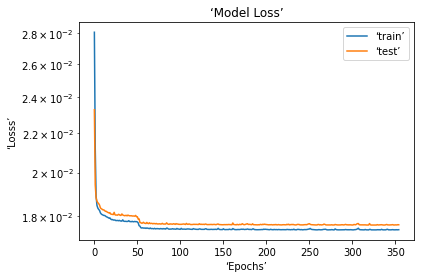

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('‘Model Loss’')
plt.ylabel('‘Losss’')
plt.xlabel('‘Epochs’')
plt.yscale("log")
plt.legend(['‘train’', '‘test’'])
plt.show()

In [ ]:
model.evaluate(x_test,x_test)

165/165 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9751


[0.027415700256824493, 0.975071370601654]

In [ ]:
w=[]
for i in range(len(y_test)):
  if y_test[i]==1 :
    w.append(i)

Threshold calculation


In [ ]:

k=0
for j in range(0,len(w)):
 x,y=model.evaluate(x_test[w[j]].reshape(1,-1),x_test[w[j]].reshape(1,-1));
 k=k+x
k=k/len(w)
k

1/1 [==============================] - 0s 13ms/step - loss: 0.2367 - accuracy: 1.0000


0.12982867283837174

In [ ]:

c=[]
for j in range(0,5255):
 x,y=model.evaluate(x_test[j].reshape(1,-1),x_test[j].reshape(1,-1));
 
 if x > 0.1 :
   y_pred[j]=1
 else:
   y_pred[j]=0


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
1/1 [==============================] - 0s 20ms/step - loss: 0.0133 - accuracy: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[ 188  285]
 [  39 4743]]
